# Business Case: 
"Use machine learning to predict heart disease for early detection, better diagnosis, and efficient healthcare resource use, reducing mortality and costs."


## Domain Analysis
The healthcare industry is increasingly adopting artificial intelligence to enhance diagnostics and predictive analytics. Within this domain, machine learning models play a significant role in medical imaging interpretation, clinical decision support, and health informatics. These models assist doctors by providing data-driven insights, ultimately leading to better patient outcomes.

One of the key components of predictive healthcare analytics is clinical decision support. Machine learning models analyze patient data to assess risk factors, helping healthcare providers make informed decisions. Another important aspect is medical imaging and diagnostics, where AI is widely used to analyze ECG results and detect anomalies. Health informatics also plays a crucial role by integrating predictive models with electronic health records to streamline workflow efficiency.

Despite its benefits, there are several challenges associated with deploying machine learning in healthcare. Data privacy and security are critical concerns, as patient information must comply with regulations such as HIPAA and GDPR. Bias in data is another issue; an unbalanced dataset may lead to skewed predictions, affecting the reliability of the model. Lastly, model interpretability remains a challenge, as healthcare professionals need clear explanations of predictions to ensure trust and accuracy in decision-mak

The dataset used for this project contains various patient attributes that are essential for predicting heart disease. Below is a description of the key features in the model:

Patient ID: A unique identifier assigned to each patient.

Slope of Peak Exercise ST Segment: Indicates the slope of the ST segment in ECG results, which is used to assess ischemia risk.

Thalassemia (Thal): Results from a Thallium stress test, categorized as normal, fixed defect, or reversible defect.

Resting Blood Pressure: The patient's blood pressure (measured in mm Hg) while at rest.

Chest Pain Type: The type of chest pain experienced by the patient, categorized into four types.

Number of Major Vessels: The count of major blood vessels visible in fluoroscopy.

Fasting Blood Sugar Greater Than 120 mg/dL: Indicates whether the patient's fasting blood sugar level exceeds 120 mg/dL (1 = Yes, 0 = No).

Resting ECG Results: The results from a resting electrocardiogram test, showing whether it is normal or abnormal.

Serum Cholesterol (mg/dL): Measures the cholesterol level in milligrams per deciliter.

ST Depression (Oldpeak): The ST depression induced by exercise relative to rest.

Sex: The patient's gender (1 = Male, 0 = Female).

Age: The age of the patient, recorded in years.

Max Heart Rate Achieved: The maximum heart rate reached during exercise.

Exercise-Induced Angina: Indicates whether angina (chest pain) was induced during exercise (1 = Yes, 0 = No).

Heart Disease Present: The target variable indicating whether the patient has heart disease (1 = Yes, 0 = No).

Understanding these features is crucial for interpreting the predictions of the model. Each variable contributes to assessing the likelihood of heart disease and assists healthcare professionals in making informed decisions.ing.

In [3]:
# Importing Libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score,classification_report
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [7]:
data = pd.read_csv('heartdisease.csv')

In [9]:
data.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [11]:
data.tail()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0
179,2nx10r,1,normal,160,3,1,0,0,201,0.0,0,54,163,0,0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [15]:
data.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [17]:
data.describe(include='O')

,patient_id,thal
count,180,180
unique,180,3
top,0z64un,normal
freq,1,98


## Data Preprocessing

### EDA(Exploratory Data Analysis)

In [21]:
# Univariate Analysis

In [23]:
#The Sweetviz library is used for automated EDA (Exploratory Data Analysis) in Python.It generates detailed visual reports to help you quickly
# understand dataset distributions.It is used for univariate analysis.

In [25]:
import sweetviz as sv
report = sv.analyze(data)
report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


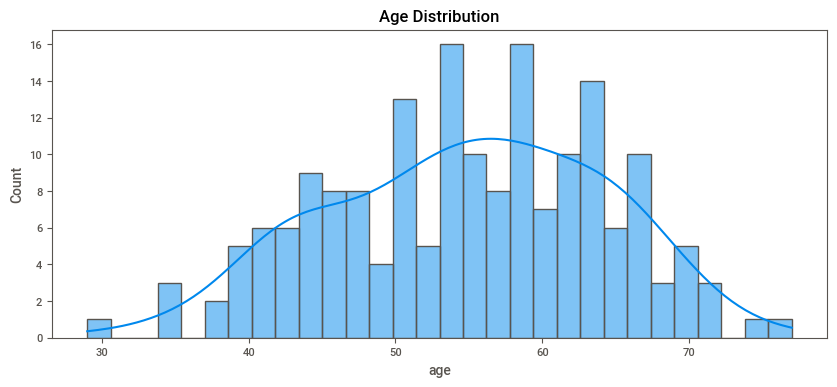

In [27]:
plt.figure(figsize=(10, 4))
sns.histplot(data['age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

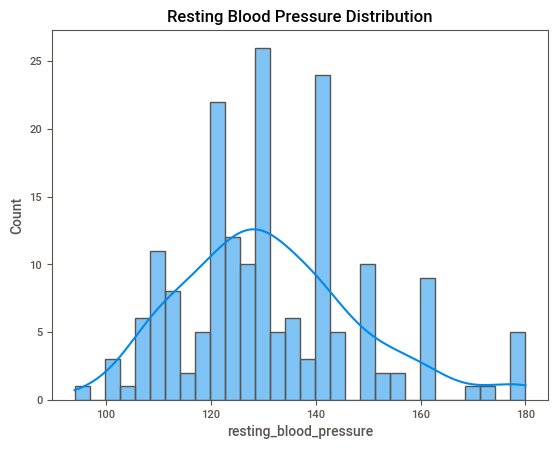

In [28]:
sns.histplot(data['resting_blood_pressure'], bins=30, kde=True)
plt.title("Resting Blood Pressure Distribution")
plt.show()

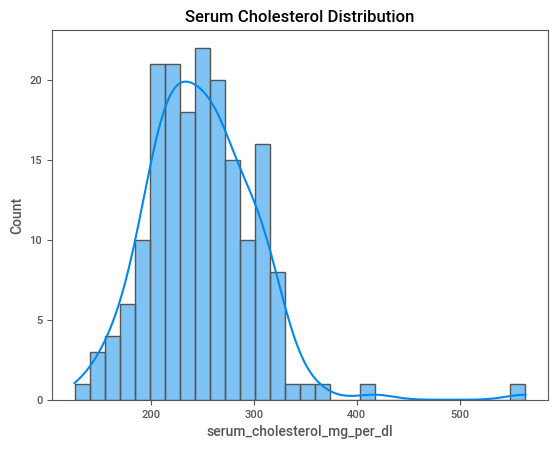

In [31]:
sns.histplot(data['serum_cholesterol_mg_per_dl'], bins=30, kde=True)
plt.title("Serum Cholesterol Distribution")
plt.show()

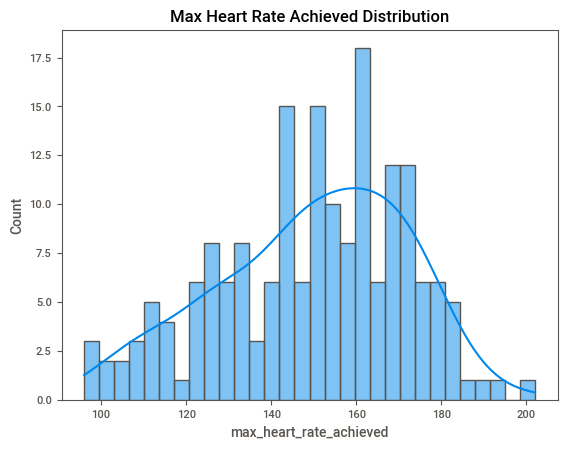

In [33]:
sns.histplot(data['max_heart_rate_achieved'], bins=30, kde=True)
plt.title("Max Heart Rate Achieved Distribution")
plt.show()

#### Insights for Univariate Analysis

- Age Distribution

The histogram shows a normal distribution with most patients in the middle-aged to senior category.
Younger patients are less frequent in the dataset.
The KDE plot confirms a smooth density estimate aligning with the histogram.

- Resting Blood Pressure Distribution

The distribution is slightly right-skewed, indicating a few patients have significantly high blood pressure.
The boxplot reveals potential outliers in the upper range, suggesting hypertensive cases.
The KDE plot reinforces the presence of a peak around normal blood pressure levels.

- Serum Cholesterol Distribution

The histogram shows a right-skewed pattern, meaning some patients have extremely high cholesterol levels.
The boxplot highlights the presence of high cholesterol outliers.
The KDE plot supports the histogram's pattern, with a peak around normal cholesterol values.

- Max Heart Rate Achieved Distribution

The histogram suggests a near-normal distribution, peaking around moderate heart rates.
The boxplot shows some lower values that might represent cases with weak cardiovascular fitness.
The KDE plot further supports the central tendency of heart rate values.m

<Axes: xlabel='count', ylabel='thal'>

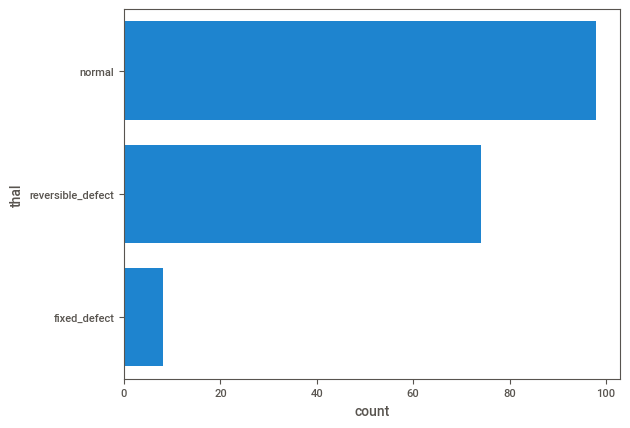

In [36]:
sns.countplot(data['thal'])

In [38]:
# Bivariate Analysis

In [40]:
# AutoViz is a Python library that automatically visualizes datasets with minimal code. It generates various plots for univariate, bivariate, and 
# multivariate analysis to help you quickly understand data patterns.

In [42]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [44]:
filename = 'heartdisease.csv'
sep=','
dft = AV.AutoViz(
    filename,
    sep=",",
    depVar='',
    dfte=None,
    header=0,
    verbose=1,
    lowess=False,
    chart_format='svg',
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
)

Shape of your Data Set loaded: (180, 15)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  8
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  4
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    15 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['patient_id']
To fix these data quality issues in the dataset, impor

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
patient_id,object,0.000000,100,,,Possible ID column: drop before modeling step.
slope_of_peak_exercise_st_segment,int64,0.000000,1,1.000000,3.000000,No issue
thal,object,0.000000,1,,,No issue
resting_blood_pressure,int64,0.000000,20,94.000000,180.000000,Column has 6 outliers greater than upper bound (170.00) or lower than lower bound(90.00). Cap them or remove them.
chest_pain_type,int64,0.000000,2,1.000000,4.000000,Column has 13 outliers greater than upper bound (5.50) or lower than lower bound(1.50). Cap them or remove them.
num_major_vessels,int64,0.000000,2,0.000000,3.000000,Column has 14 outliers greater than upper bound (2.50) or lower than lower bound(-1.50). Cap them or remove them.
fasting_blood_sugar_gt_120_mg_per_dl,int64,0.000000,1,0.000000,1.000000,No issue
resting_ekg_results,int64,0.000000,1,0.000000,2.000000,No issue
serum_cholesterol_mg_per_dl,int64,0.000000,65,126.000000,564.000000,Column has 2 outliers greater than upper bound (382.50) or lower than lower bound(112.50). Cap them or remove them.
oldpeak_eq_st_depression,float64,0.000000,NA,0.000000,6.200000,Column has 4 outliers greater than upper bound (4.00) or lower than lower bound(-2.40). Cap them or remove them.


All Plots done
Time to run AutoViz = 6 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

<Figure size 1500x1200 with 0 Axes>

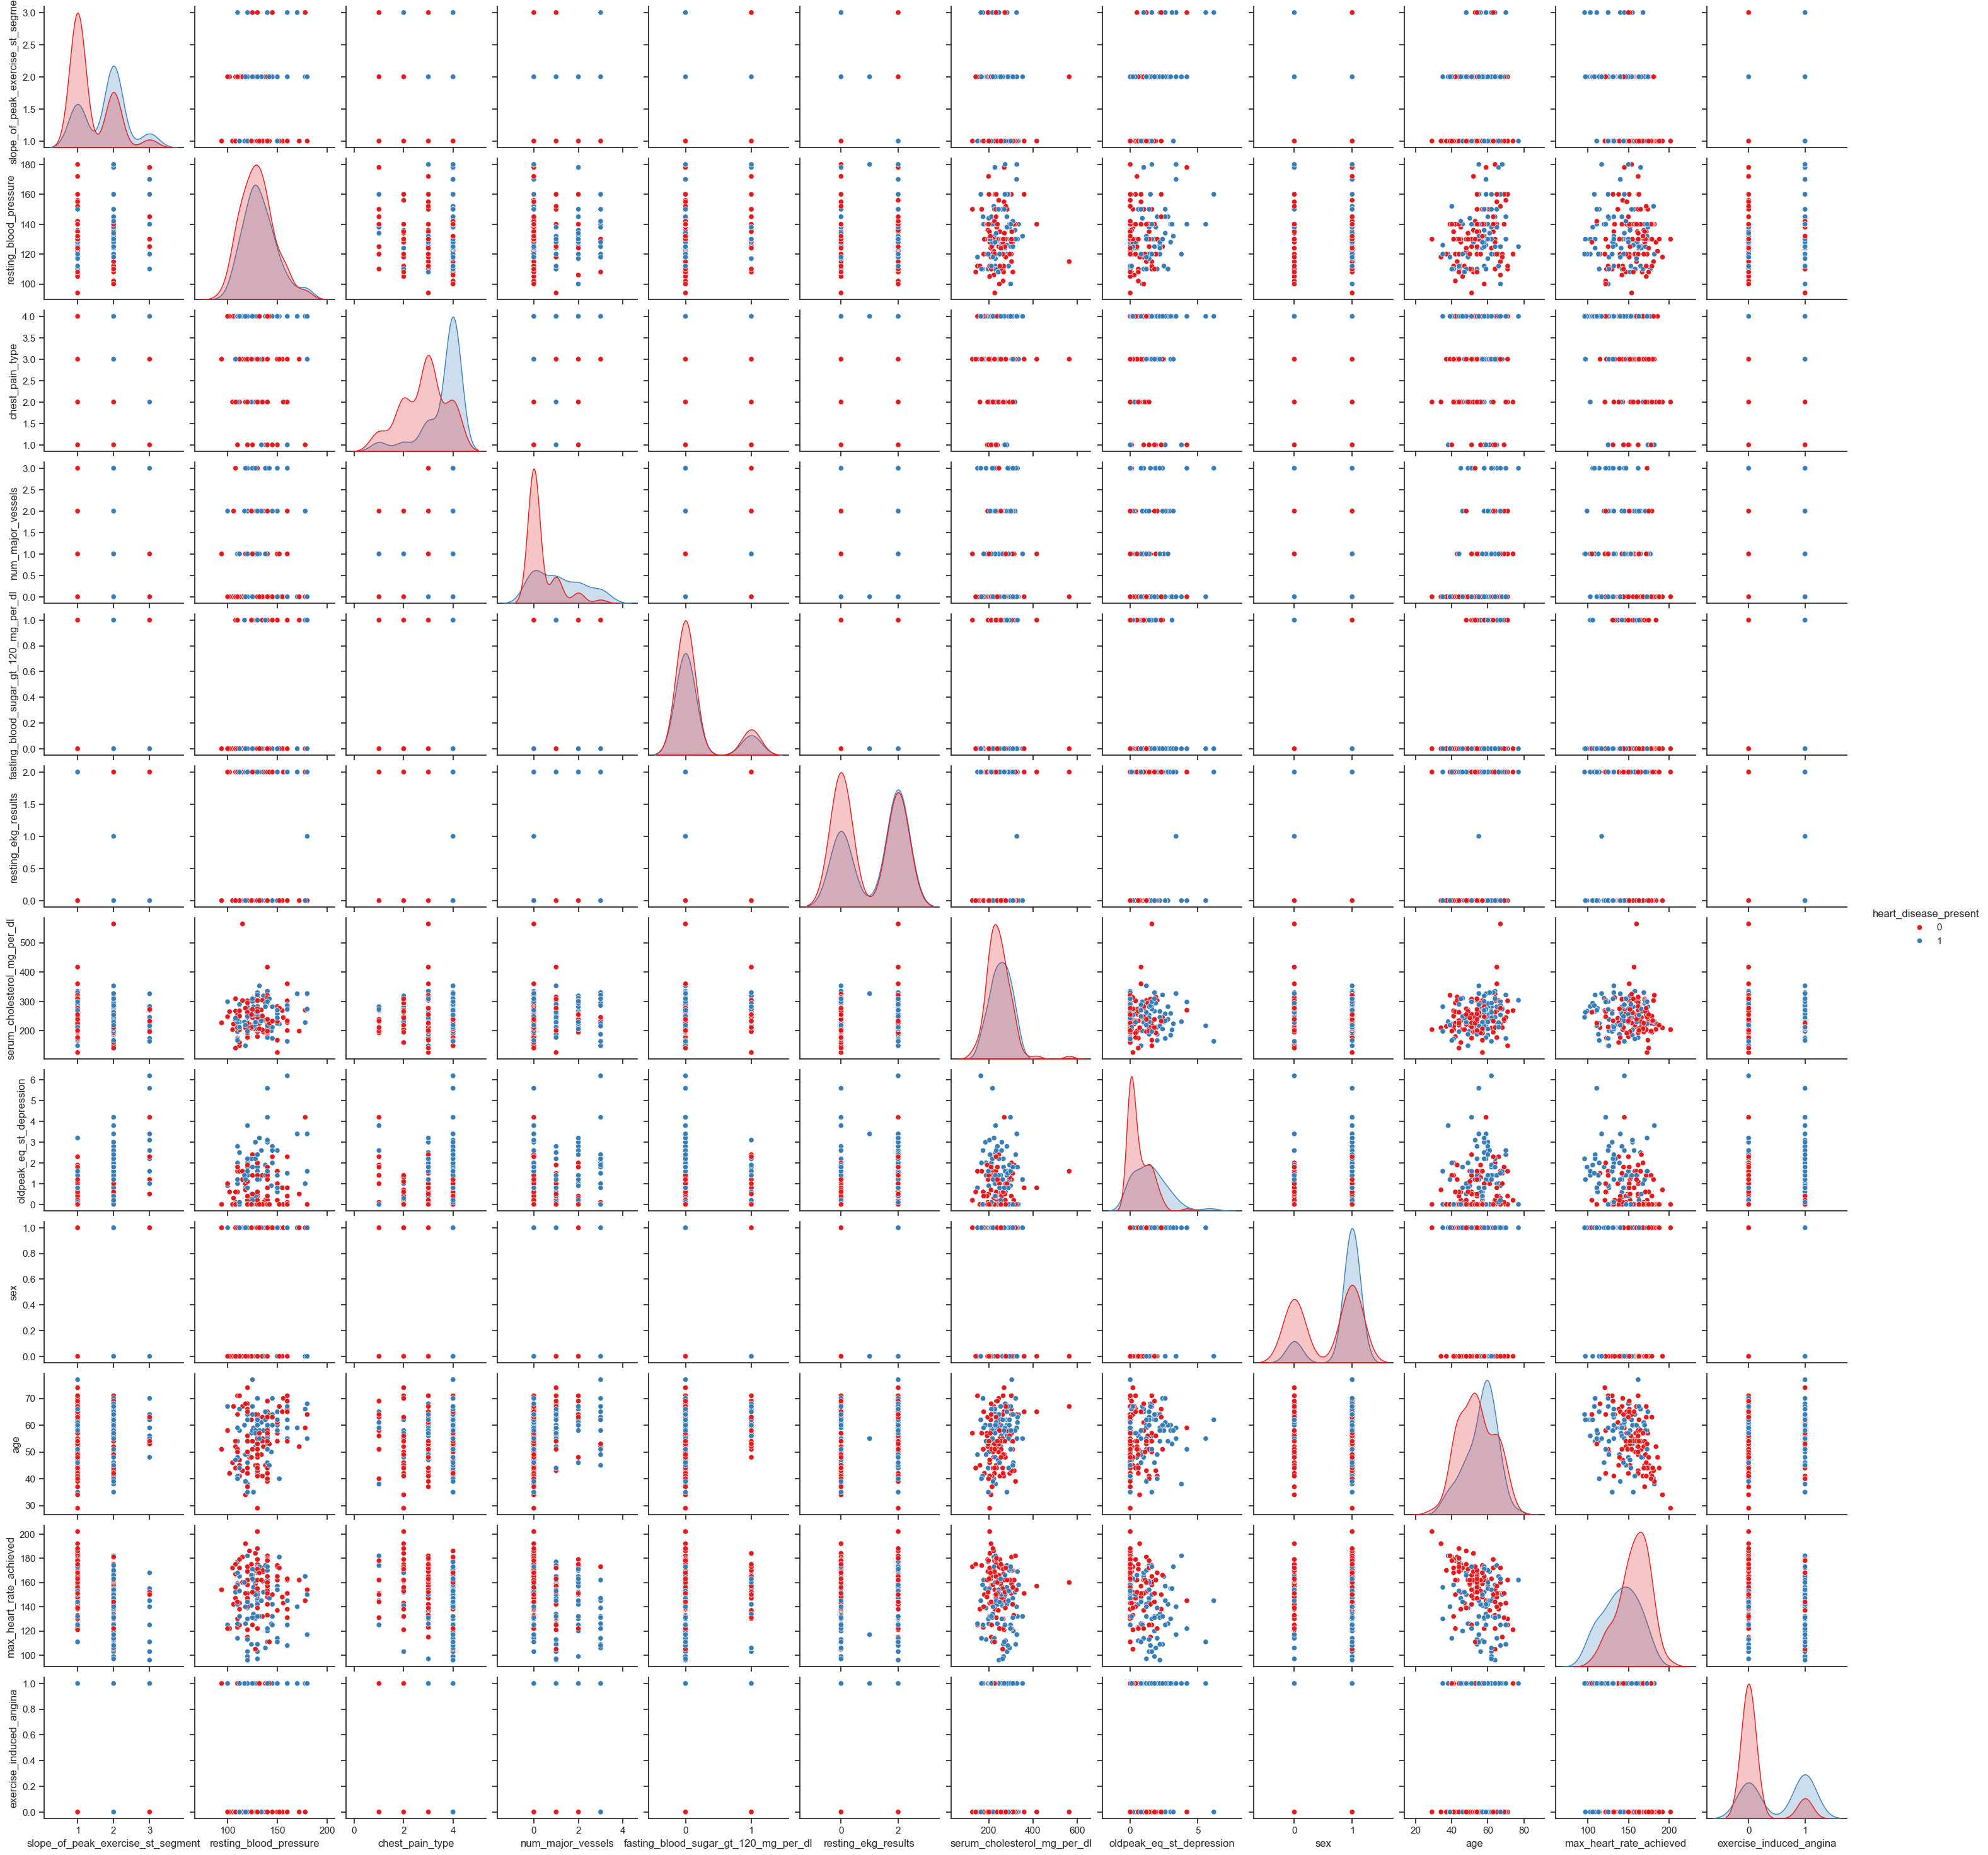

In [50]:
# Scatterplots to observe relationships
plt.figure(figsize=(15, 12))
sns.pairplot(data, hue='heart_disease_present', diag_kind='kde')
plt.show()

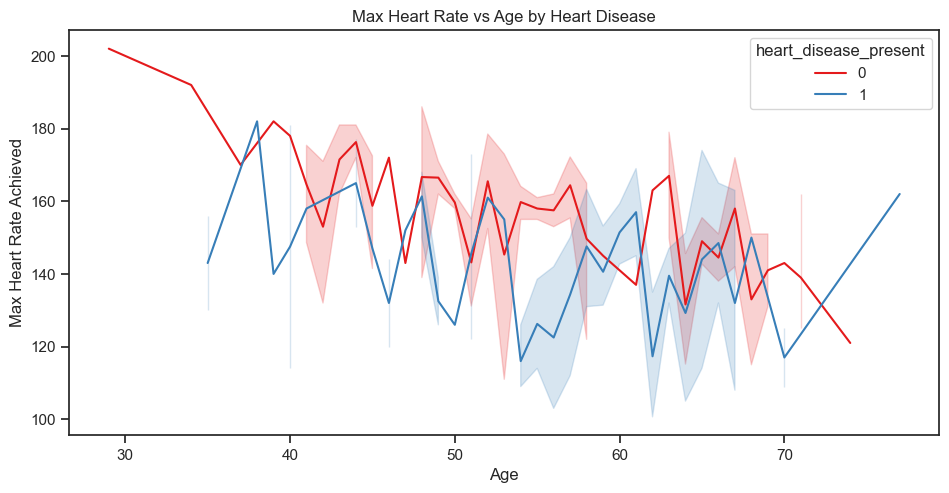

In [51]:
# Line plots for numerical trends over age
plt.figure(figsize=(10, 5))
sns.lineplot(x='age', y='max_heart_rate_achieved', hue='heart_disease_present', data=data)
plt.title("Max Heart Rate vs Age by Heart Disease")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate Achieved")
plt.show()

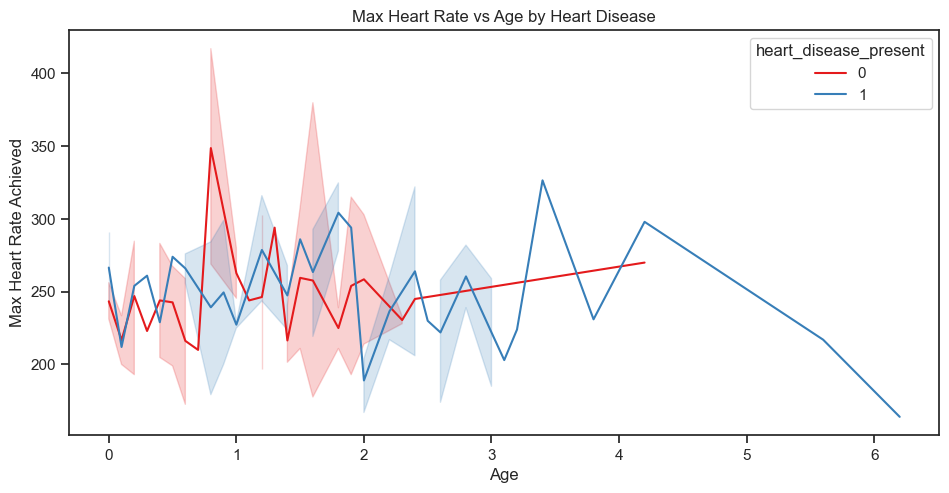

In [54]:
# Line plots for numerical trends over age
plt.figure(figsize=(10, 5))
sns.lineplot(x='oldpeak_eq_st_depression', y='serum_cholesterol_mg_per_dl', hue='heart_disease_present', data=data)
plt.title("Max Heart Rate vs Age by Heart Disease")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate Achieved")
plt.show()

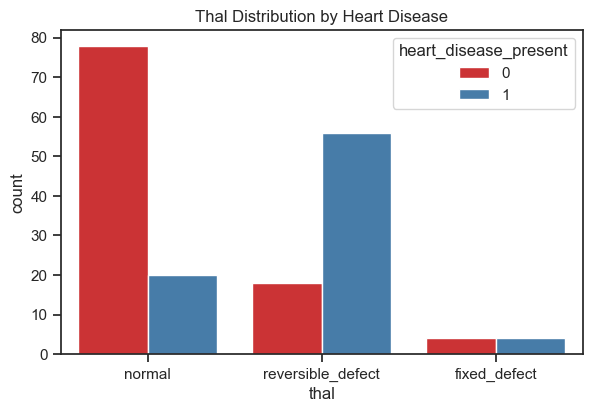

In [56]:
# Count plot for categorical feature (thal)
plt.figure(figsize=(6, 4))
sns.countplot(x='thal', hue='heart_disease_present', data=data)
plt.title("Thal Distribution by Heart Disease")
plt.show()

In [58]:
# Null values 
data.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

In [60]:
# Outliers

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Resting Blood Pressure Boxplot')

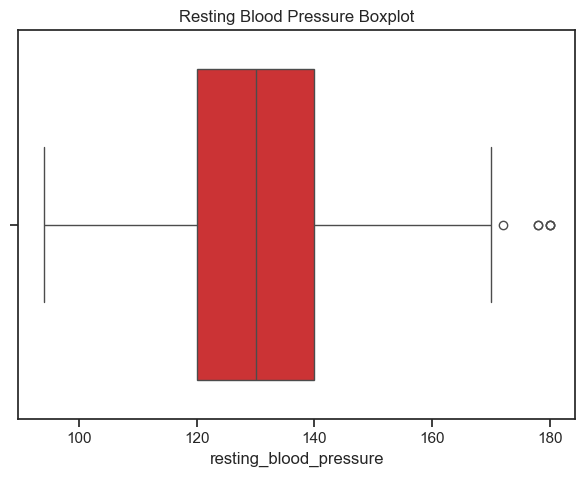

In [64]:
sns.boxplot(x='resting_blood_pressure',data=data)
plt.title("Resting Blood Pressure Boxplot")

In [66]:
Q1 = data['resting_blood_pressure'].quantile(0.25)
Q3 = data['resting_blood_pressure'].quantile(0.75)
IQR = Q3-Q1
print("IQR = ",IQR)

lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
print("Lower Bound =",lower_bound)
print("Upper Bound =",upper_bound)

IQR =  20.0
Lower Bound = 90.0
Upper Bound = 170.0


In [68]:
outlier = data[(data['resting_blood_pressure'] < lower_bound) | (data['resting_blood_pressure'] > upper_bound)]
data.drop(outlier.index,inplace=True)

Text(0.5, 1.0, 'Resting Blood Pressure Boxplot')

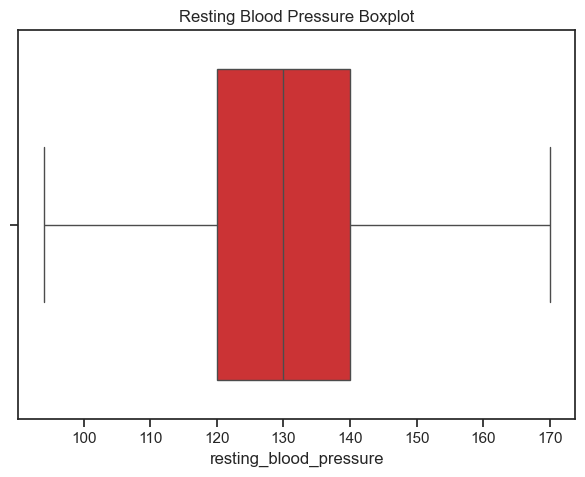

In [70]:
sns.boxplot(x='resting_blood_pressure',data=data)
plt.title("Resting Blood Pressure Boxplot")

Text(0.5, 1.0, 'chest_pain_type')

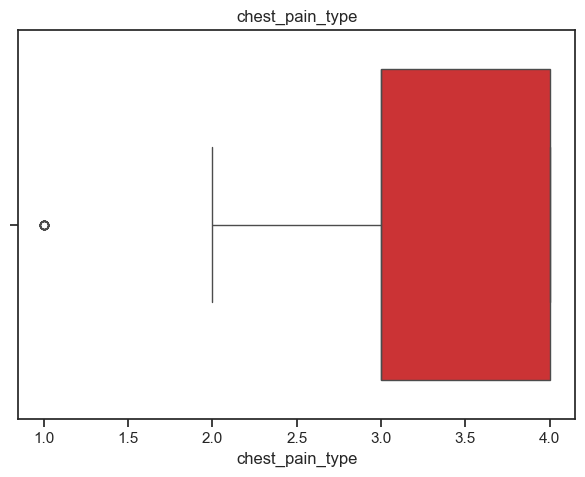

In [72]:
sns.boxplot(x='chest_pain_type',data=data)
plt.title("chest_pain_type")

In [74]:
Q1 = data['chest_pain_type'].quantile(0.25)
Q3 = data['chest_pain_type'].quantile(0.75)
IQR = Q3-Q1
print("IQR = ",IQR)

lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
print("Lower Bound =",lower_bound)
print("Upper Bound =",upper_bound)

IQR =  1.0
Lower Bound = 1.5
Upper Bound = 5.5


In [76]:
outlier = data[(data['chest_pain_type'] < lower_bound) | (data['chest_pain_type'] > upper_bound)]
data.drop(outlier.index,inplace=True)

Text(0.5, 1.0, 'chest_pain_type')

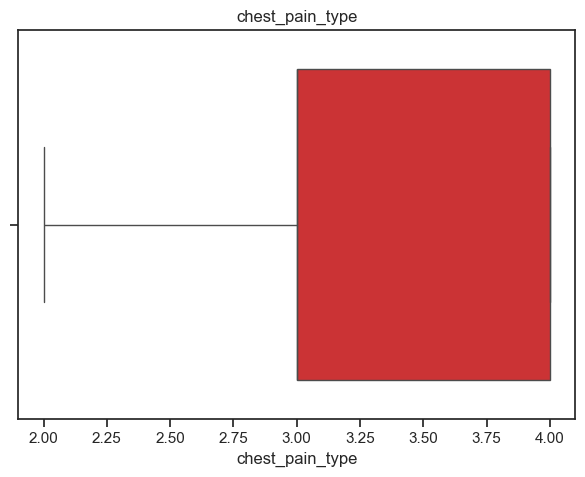

In [78]:
sns.boxplot(x='chest_pain_type',data=data)
plt.title("chest_pain_type")

Text(0.5, 1.0, 'num_major_vessels')

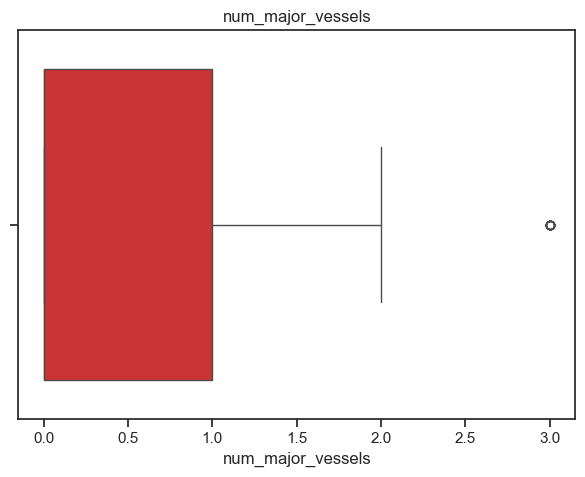

In [79]:
sns.boxplot(x='num_major_vessels',data=data)
plt.title("num_major_vessels")

In [82]:
Q1 = data['num_major_vessels'].quantile(0.25)
Q3 = data['num_major_vessels'].quantile(0.75)
IQR = Q3-Q1
print("IQR =",IQR)

lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
print("Lower Bound = ",lower_bound)
print("Upper Bound = ",upper_bound)

IQR = 1.0
Lower Bound =  -1.5
Upper Bound =  2.5


In [84]:
outlier = data[(data['num_major_vessels'] < lower_bound) | (data['num_major_vessels'] > upper_bound)]
data.drop(outlier.index,inplace=True)

Text(0.5, 1.0, 'num_major_vessels')

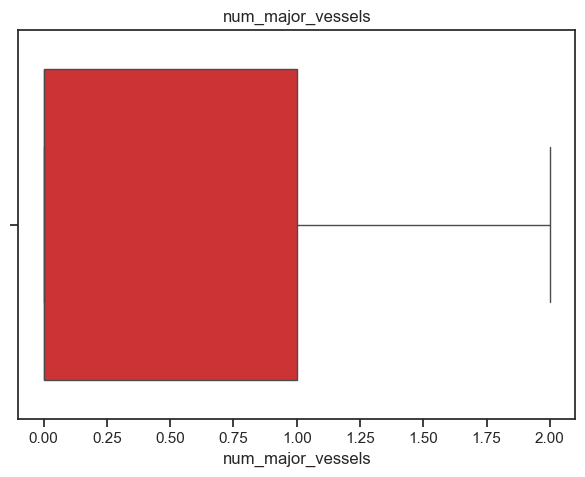

In [86]:
sns.boxplot(x='num_major_vessels',data=data)
plt.title("num_major_vessels")

Text(0.5, 1.0, 'serum_cholesterol_mg_per_dl')

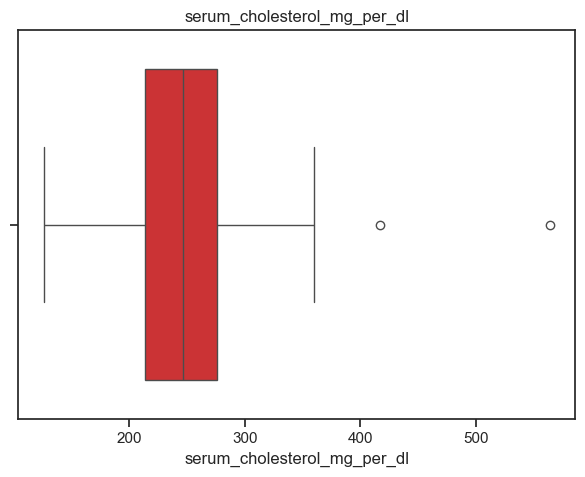

In [87]:
sns.boxplot(x='serum_cholesterol_mg_per_dl',data=data)
plt.title("serum_cholesterol_mg_per_dl")

In [90]:
Q1 = data['serum_cholesterol_mg_per_dl'].quantile(0.25)
Q3 = data['serum_cholesterol_mg_per_dl'].quantile(0.75)
IQR = Q3-Q1
print("IQR =",IQR)

lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
print("Lower Bound = ",lower_bound)
print("Upper Bound = ",upper_bound)

IQR = 62.75
Lower Bound =  119.375
Upper Bound =  370.375


In [92]:
outlier = data[(data['serum_cholesterol_mg_per_dl'] < lower_bound) | (data['serum_cholesterol_mg_per_dl'] > upper_bound)]
data.drop(outlier.index,inplace=True)

Text(0.5, 1.0, 'serum_cholesterol_mg_per_dl')

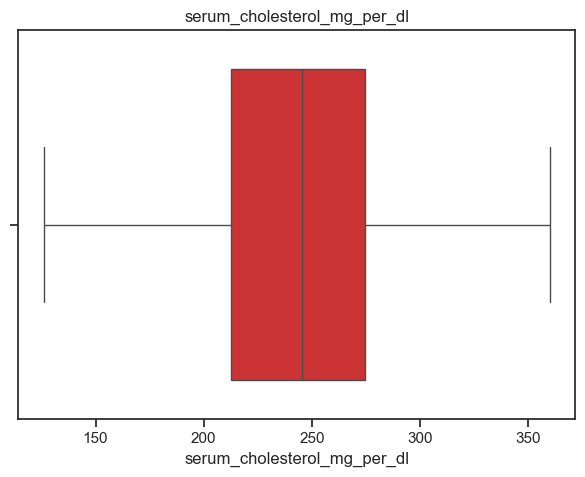

In [94]:
sns.boxplot(x='serum_cholesterol_mg_per_dl',data=data)
plt.title("serum_cholesterol_mg_per_dl")

Text(0.5, 1.0, 'oldpeak_eq_st_depression')

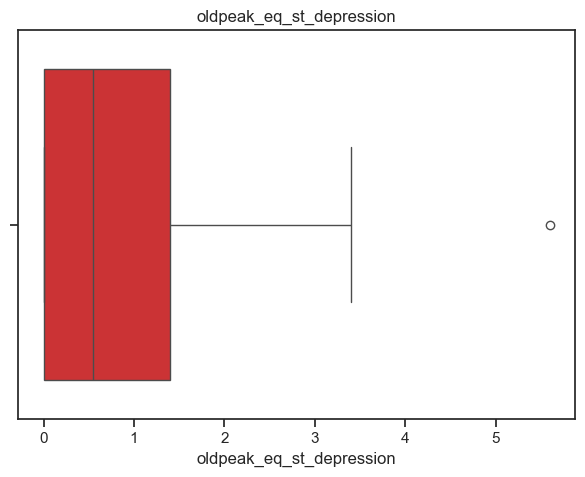

In [96]:
sns.boxplot(x='oldpeak_eq_st_depression',data=data)
plt.title("oldpeak_eq_st_depression")

In [97]:
Q1 = data['oldpeak_eq_st_depression'].quantile(0.25)
Q3 = data['oldpeak_eq_st_depression'].quantile(0.75)
IQR = Q3-Q1
print("IQR =",IQR)

lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
print("Lower Bound = ",lower_bound)
print("Upper Bound = ",upper_bound)

IQR = 1.4
Lower Bound =  -2.0999999999999996
Upper Bound =  3.4999999999999996


In [100]:
outlier = data[(data['oldpeak_eq_st_depression'] < lower_bound) | (data['oldpeak_eq_st_depression'] > upper_bound)]
data.drop(outlier.index,inplace=True)

Text(0.5, 1.0, 'oldpeak_eq_st_depression')

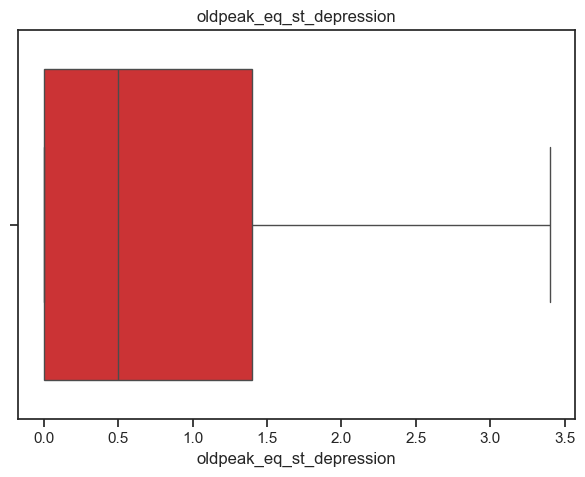

In [102]:
sns.boxplot(x='oldpeak_eq_st_depression',data=data)
plt.title("oldpeak_eq_st_depression")

## Feature Engineering

### Encoding

In [106]:
data['thal'].value_counts()

thal
normal               81
reversible_defect    57
fixed_defect          7
Name: count, dtype: int64

In [108]:
# One Hot Encoding

In [110]:
df1 = pd.get_dummies(data['thal'],prefix='thal',dtype=int,drop_first=True)
data = pd.concat([data,df1],axis=1).drop(['thal'],axis=1)

In [112]:
data.head()

,patient_id,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present,thal_normal,thal_reversible_defect
0,0z64un,1,128,2,0,0,2,308,0.0,1,45,170,0,0,1,0
1,ryoo3j,2,110,3,0,0,0,214,1.6,0,54,158,0,0,1,0
3,l2xjde,1,152,4,0,0,0,223,0.0,1,40,181,0,1,0,1
5,ldukkw,1,130,3,0,0,0,180,0.0,1,42,150,0,0,1,0
6,2gbyh9,2,150,4,2,0,2,258,2.6,0,60,157,0,1,0,1


In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145 entries, 0 to 179
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            145 non-null    object 
 1   slope_of_peak_exercise_st_segment     145 non-null    int64  
 2   resting_blood_pressure                145 non-null    int64  
 3   chest_pain_type                       145 non-null    int64  
 4   num_major_vessels                     145 non-null    int64  
 5   fasting_blood_sugar_gt_120_mg_per_dl  145 non-null    int64  
 6   resting_ekg_results                   145 non-null    int64  
 7   serum_cholesterol_mg_per_dl           145 non-null    int64  
 8   oldpeak_eq_st_depression              145 non-null    float64
 9   sex                                   145 non-null    int64  
 10  age                                   145 non-null    int64  
 11  max_heart_rate_achieved 

### Scaling

In [117]:
data.drop('patient_id',axis=1,inplace=True)

In [119]:
data.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present,thal_normal,thal_reversible_defect
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,1.503448,128.634483,3.268966,0.503448,0.117241,0.993103,245.848276,0.824138,0.682759,53.786207,151.006897,0.289655,0.413793,0.558621,0.393103
std,0.602358,14.658527,0.766079,0.727669,0.322823,1.003442,45.045399,0.904255,0.467015,9.203099,22.042414,0.455175,0.494219,0.498273,0.490133
min,1.000000,94.000000,2.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,212.000000,0.000000,0.000000,46.000000,138.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,0.000000,246.000000,0.500000,1.000000,54.000000,154.000000,0.000000,0.000000,1.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,275.000000,1.400000,1.000000,60.000000,169.000000,1.000000,1.000000,1.000000,1.000000
max,3.000000,170.000000,4.000000,2.000000,1.000000,2.000000,360.000000,3.400000,1.000000,74.000000,202.000000,1.000000,1.000000,1.000000,1.000000


In [121]:
scale = MinMaxScaler()
data[['slope_of_peak_exercise_st_segment','resting_blood_pressure','chest_pain_type','num_major_vessels','resting_ekg_results','serum_cholesterol_mg_per_dl','oldpeak_eq_st_depression','age','max_heart_rate_achieved']] = \
scale.fit_transform(data[['slope_of_peak_exercise_st_segment','resting_blood_pressure','chest_pain_type','num_major_vessels','resting_ekg_results','serum_cholesterol_mg_per_dl','oldpeak_eq_st_depression','age','max_heart_rate_achieved']])

In [123]:
data.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present,thal_normal,thal_reversible_defect
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,0.251724,0.455717,0.634483,0.251724,0.117241,0.496552,0.512172,0.242394,0.682759,0.550805,0.518933,0.289655,0.413793,0.558621,0.393103
std,0.301179,0.192875,0.383040,0.363834,0.322823,0.501721,0.192502,0.265957,0.467015,0.204513,0.207947,0.455175,0.494219,0.498273,0.490133
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.342105,0.500000,0.000000,0.000000,0.000000,0.367521,0.000000,0.000000,0.377778,0.396226,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.473684,0.500000,0.000000,0.000000,0.000000,0.512821,0.147059,1.000000,0.555556,0.547170,0.000000,0.000000,1.000000,0.000000
75%,0.500000,0.605263,1.000000,0.500000,0.000000,1.000000,0.636752,0.411765,1.000000,0.688889,0.688679,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Feature Selection

In [126]:
# patient_id column is already removed.

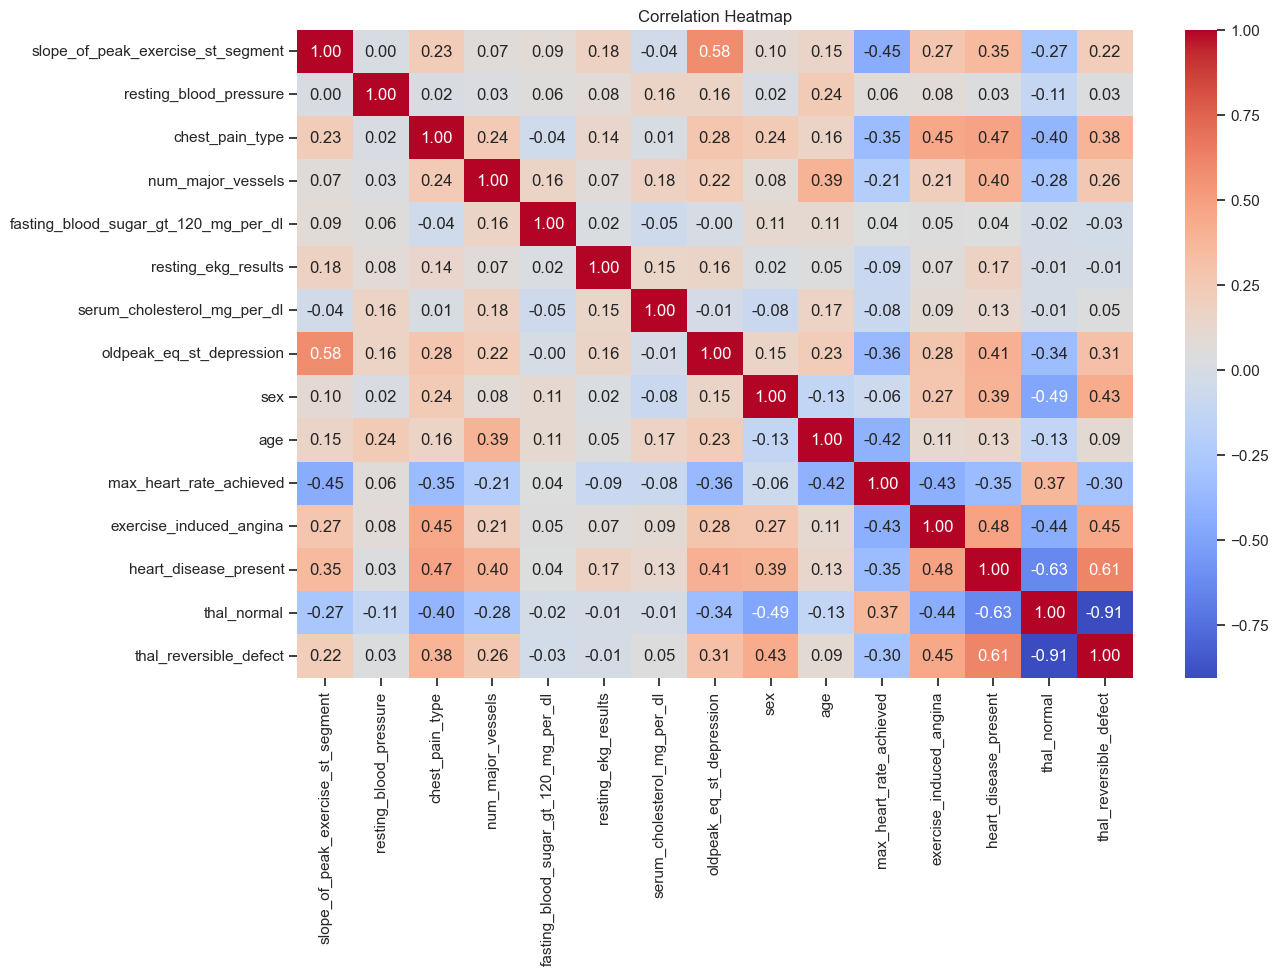

In [128]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

### Splitting data into train and test set

In [131]:
x = data.drop(columns='heart_disease_present',axis=1)
x

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,thal_normal,thal_reversible_defect
0,0.0,0.447368,0.0,0.0,0,1.0,0.777778,0.000000,1,0.355556,0.698113,0,1,0
1,0.5,0.210526,0.5,0.0,0,0.0,0.376068,0.470588,0,0.555556,0.584906,0,1,0
3,0.0,0.763158,1.0,0.0,0,0.0,0.414530,0.000000,1,0.244444,0.801887,0,0,1
5,0.0,0.473684,0.5,0.0,0,0.0,0.230769,0.000000,1,0.288889,0.509434,0,1,0
6,0.5,0.736842,1.0,1.0,0,1.0,0.564103,0.764706,0,0.688889,0.575472,0,0,1
7,0.5,0.736842,1.0,0.5,0,1.0,0.641026,0.176471,1,0.622222,0.150943,1,0,0
8,1.0,1.000000,1.0,0.0,0,1.0,0.854701,1.000000,1,0.666667,0.415094,1,0,1
9,0.5,0.342105,0.5,0.0,0,0.0,0.397436,0.470588,0,0.466667,0.584906,0,1,0
10,0.5,0.342105,1.0,0.0,0,1.0,0.752137,0.117647,1,0.822222,0.518868,0,1,0
11,0.0,0.605263,1.0,0.0,0,0.0,0.427350,0.000000,1,0.288889,0.773585,0,1,0


In [133]:
y = data.heart_disease_present
y

0      0
1      0
3      1
5      0
6      1
7      1
8      1
9      0
10     0
11     0
12     1
13     0
15     1
16     0
17     1
18     0
19     1
20     0
22     0
23     0
24     0
25     0
26     0
27     0
28     1
29     0
30     0
32     1
34     1
35     0
36     0
37     0
38     0
39     1
40     0
41     0
42     0
44     0
45     1
46     0
47     0
48     1
49     0
50     1
51     0
53     1
54     1
55     0
56     1
57     1
58     0
59     1
61     1
62     1
63     0
64     0
65     1
67     0
68     0
70     0
71     0
73     0
74     1
76     0
77     1
78     1
79     1
80     0
81     1
82     1
83     1
84     0
86     0
87     1
88     0
89     0
90     0
91     1
92     0
93     1
94     0
95     0
96     1
98     0
100    0
101    0
102    1
103    0
104    0
105    0
106    0
107    1
109    1
110    0
111    0
114    0
115    0
116    0
117    1
118    1
121    0
122    0
125    0
126    0
127    0
128    1
129    1
130    0
131    0
132    0
133    1
1

In [135]:
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=42)

In [137]:
X_train.shape

(108, 14)

In [139]:
X_test.shape

(37, 14)

In [141]:
# Checking algorithm accuracy before balancing

In [143]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [145]:
y_pred = lr.predict(X_test)

In [147]:
y_pred

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [149]:
print('Accuracy score:',accuracy_score(y_test,y_pred))

Accuracy score: 0.7837837837837838


In [151]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.90      0.83        21
           1       0.83      0.62      0.71        16

    accuracy                           0.78        37
   macro avg       0.80      0.76      0.77        37
weighted avg       0.79      0.78      0.78        37



In [153]:
data.heart_disease_present.value_counts()

heart_disease_present
0    85
1    60
Name: count, dtype: int64

<Axes: xlabel='heart_disease_present', ylabel='count'>

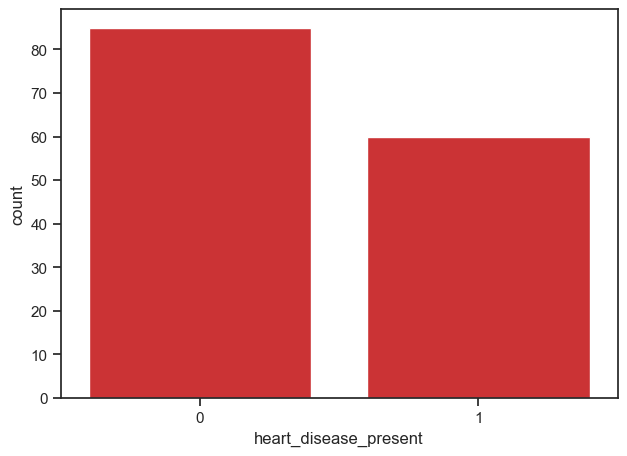

In [155]:
sns.countplot(x='heart_disease_present',data=data)

In [157]:
# Data is imbalanced for balancing it here over sampling method is used.

In [159]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote,y_train_smote = smote.fit_resample(X_train,y_train)

In [161]:
from collections import Counter
print("Actual values:",Counter(y_train))
print("Balanced values:",Counter(y_train_smote))

Actual values: Counter({0: 64, 1: 44})
Balanced values: Counter({0: 64, 1: 64})


In [163]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

In [165]:
# Train and evaluate models
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))


Training Logistic Regression...
Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.76      0.90      0.83        21
           1       0.83      0.62      0.71        16

    accuracy                           0.78        37
   macro avg       0.80      0.76      0.77        37
weighted avg       0.79      0.78      0.78        37


Training Decision Tree...
Accuracy: 0.70
              precision    recall  f1-score   support

           0       0.69      0.86      0.77        21
           1       0.73      0.50      0.59        16

    accuracy                           0.70        37
   macro avg       0.71      0.68      0.68        37
weighted avg       0.71      0.70      0.69        37


Training Random Forest...
Accuracy: 0.73
              precision    recall  f1-score   support

           0       0.72      0.86      0.78        21
           1       0.75      0.56      0.64        16

    accuracy                           0.73       

In [ ]:
# From above models Logistic Regression and SVM has the highest accuracy i.e 78%

In [167]:
# Hyperparameter Tuning for Logistic Regression
from sklearn.model_selection import GridSearchCV
log_reg_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

log_reg = LogisticRegression()
log_reg_grid_search = GridSearchCV(log_reg, log_reg_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
log_reg_grid_search.fit(X_train, y_train)

# Best Logistic Regression model evaluation
best_log_reg = log_reg_grid_search.best_estimator_
y_pred_log_reg = best_log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
print("Best Logistic Regression Parameters:", log_reg_grid_search.best_params_)
print("Logistic Regression Test Set Accuracy:", log_reg_accuracy)

Best Logistic Regression Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Logistic Regression Test Set Accuracy: 0.8108108108108109


### Conclusion
- After removing outliers, the model achieved an accuracy of 78%. However, before outlier removal, the accuracy was 84%, suggesting that outlier removal impacted model performance. The Final Accuracy after hyperparameter tuning is 81%.

The heart disease prediction model demonstrates the power of machine learning in transforming healthcare. By leveraging structured patient data, the model aids in early detection, improving diagnostic accuracy, reducing costs, and optimizing healthcare resources. The case study illustrates how real-world implementation can significantly enhance patient care, reducing diagnosis time and improving efficiency.

Despite its benefits, challenges such as data privacy, bias, and interpretability remain crucial considerations. Addressing these issues ensures that the model remains ethical, transparent, and reliable in medical decision-making. As AI continues to evolve, integrating advanced predictive models into healthcare will play a vital role in proactive disease management, ultimately leading to better health outcomes for patients worldwide.